# LC04 Synthèses inorganiques 

In [1]:
%pylab qt
%matplotlib inline

import fitting

Populating the interactive namespace from numpy and matplotlib


##### Fit results #####
RAW
        optimised params : [ 5.05525033e+01 -1.44600537e-03]
        uncertainties    : [1.92707003e+00 1.07075956e-03]
        chi2r            : 1.8683016466745763
        r2               : 0.9804725164111241
READABLE
        slope      = (5.1 +/- 0.2) * 1e1
        y0         = (-1 +/- 1) * 1e-3
#######################
Concentration molaire  : 0.42 +/- 0.02 g/L
Concentration massique : 0.98 +/- 0.04 mmol/L


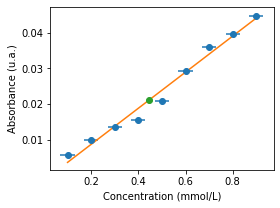

In [44]:
x  = (np.arange(9)+1)*1e-4 # Concentration en mol/L
ux = np.ones(len(x))*3e-5
y  = np.array([0.057, 0.098, 0.134, 0.156, 0.207, 0.292, 0.360, 0.395, 0.447])*1e-1
uy = y*0.01

fitter = fitting.Fit("linear", x=x, y=y, uy=uy, ux=ux)
fit_params, ufit_params = fitter.fit(manualguess_params=None, verbosemode=True)
yfit = fitter.func(x, *fit_params)

plt.figure(figsize=(4,3))
plt.errorbar(x*1e3, y, xerr=ux*1e3, yerr=uy, fmt="o")
plt.plot(x*1e3, yfit)
plt.xlabel("Concentration (mmol/L)")
plt.ylabel("Absorbance (u.a.)")

slope, b  = fit_params
uslope, _ = ufit_params 
a_I2      = 0.021
u_aI2     = 0.0001

C  = a_I2 / slope
uC = np.sqrt((u_aI2/a_I2)**2 + (uslope/slope)**2) * C
M = 2363

print("Concentration molaire  : %.2f +/- %.2f g/L"%(C*1e3, uC*1e3))
print("Concentration massique : %.2f +/- %.2f mmol/L"%(C*M, uC*M))

plt.plot([(a_I2-b) / slope*1e3], [a_I2], "oC2")